<a href="https://colab.research.google.com/github/graciemwilliams/knn/blob/main/assignment_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor



## KNN

**Q0.**
1. What is the difference between regression and classification? *Regression predicts a continuous numberical value while classifcation predicts categorigal labels.*

2. What is a confusion table? What does it help us understand about a model's performance? *A confusion table summarizes the performance of a classification model. It shows the counts of true positives, false positives, true negatives, and false negatives. It helps to understand the model's accuracy and precision.*

3. What does the SSE quantify about a particular model? *SSE is the sum of squared errors. It quanitfies the total squared difference between actual and predicted values in a regression model. The lower the SSE, the better the fit.*

4. What are overfitting and underfitting? *Overfitting is when the model learns noise from the training data and performs well on that data but performs poorly on unseen data. Underfitting is when the model is too simple to identify patterns in the data. It performs poorly on both training and test data.*

5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance? *Splitting the data into training and testing sets allows you to evaluate how well the model generalizes. Choosing k utilizing the test set ensures that the model is not underfitting or overfitting.*

6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach. *Class label prediction is simple and interpretable, but lacks confidence informaiton. Probability distribution over class labels shows information regarding uncertainty and allows threshold tuning, but is difficult to interpret and can tend to be misleading.*

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?

In [40]:
upload = files.upload()
df = pd.read_csv('animals.csv')

Saving animals.csv to animals.csv


In [43]:
# print the values for each of the seven labels
for i in range(1, 8):
  print(df[df['class'] == i]['animal'].value_counts())

animal
aardvark    1
mink        1
mongoose    1
opossum     1
oryx        1
platypus    1
polecat     1
pony        1
porpoise    1
puma        1
pussycat    1
raccoon     1
reindeer    1
seal        1
sealion     1
squirrel    1
vampire     1
vole        1
wallaby     1
mole        1
lynx        1
antelope    1
lion        1
bear        1
boar        1
buffalo     1
calf        1
cavy        1
cheetah     1
deer        1
dolphin     1
elephant    1
fruitbat    1
giraffe     1
girl        1
goat        1
gorilla     1
hamster     1
hare        1
leopard     1
wolf        1
Name: count, dtype: int64
animal
chicken     1
crow        1
vulture     1
swan        1
sparrow     1
skua        1
skimmer     1
rhea        1
pheasant    1
penguin     1
parakeet    1
ostrich     1
lark        1
kiwi        1
hawk        1
gull        1
flamingo    1
duck        1
dove        1
wren        1
Name: count, dtype: int64
animal
pitviper    1
seasnake    1
slowworm    1
tortoise    1
tuatara     1
Nam

In [46]:
# print how big the classes are
print(df['class'].value_counts())

# describe each of the variables
df.describe()

class
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)

In [53]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Drop 'class' (target variable) and 'animal'
X = df.drop(columns=['class', 'animal'])
y = df['class']

# Split data into 50% training and 50% test/validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.

In [60]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Finding optimal k using cross-validation
k_values = range(1, 21)
k_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    k_scores.append(scores.mean())

optimal_k = k_values[np.argmax(k_scores)]

# Train the k-NN model with optimal k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?

In [58]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[21  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  1  1  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  5]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        10
           3       0.50      0.50      0.50         2
           4       0.88      1.00      0.93         7
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         5

    accuracy                           0.96        51
   macro avg       0.91      0.86      0.87        51
weighted avg       0.96      0.96      0.96        51

0.9607843137254902


The model had a 96% accuracy on the test data. Class 1, 2, 4, 6, and 7 were classified correctly and there were three miscalculations total for Class 3 and Class 5. These mistakes may be made because these classes share similar features.

5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [56]:
# Restricted model with only 'milk', 'aquatic', and 'airborne'
X_restricted = df[["milk", "aquatic", "airborne"]]
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_restricted, y, test_size=0.5, random_state=42, stratify=y)

# Standardize restricted features
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_res_scaled = scaler.transform(X_test_res)

# Train k-NN with restricted features
knn_res = KNeighborsClassifier(n_neighbors=optimal_k)
knn_res.fit(X_train_res_scaled, y_train_res)

# Predictions for restricted model
y_pred_res = knn_res.predict(X_test_res_scaled)
conf_matrix_res = confusion_matrix(y_test_res, y_pred_res)
print("Confusion Matrix for Restricted Model:")
print(conf_matrix_res)

# Predict probabilities
y_proba_res = knn_res.predict_proba(X_test_res_scaled)
print("\nPredicted Probabilities for Restricted Model:")
print(y_proba_res[:5])  # Show first 5 rows for brevity

Confusion Matrix for Restricted Model:
[[19  2  0  0  0  0  0]
 [ 0  7  2  1  0  0  0]
 [ 0  0  1  1  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  3  1  0  0  0  0]
 [ 0  0  1  4  0  0  0]]

Predicted Probabilities for Restricted Model:
[[0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]]


No, not all of the classes were well represented in the predictions. Some classes, like class 5 had no correct predictions. This happens because the model is only using three features and those features do not fully capture the differnces between the seven animal classes.

## Visualization

Q2. Go to https://data.cms.gov/search.

Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data


*   Does the data dictionary document how missings are handled?
*   For categorical variables, does it describe the possible values and missing value codes?
*   For the numeric variables, does it describe how missing values are handled
* Summarize your opinion of the data dictionary.
* Pick out a few interesting variables, and explain why you find them jointly interesting.

The data dictionary that I selected was the 2020 COVID-19 Nursing Home Data. The dictionary documents that "CMS and CDC perform quality assurance checks on the data and may suppress data that appear to be erroneous" and also states that "missing numbers may be due to a data entry error on the part of the facility". For categorical variables, the data dictioinary does describe the possible values and missing value codes. For the numeric variables, it does describe how missing values are handled. I think that the data dictionary is informative, detailed, and helpful in understanding the data available. Some interesting variables that I found were provider states, total number of occupied beds, Residents Total COVID-19 Deaths, and ResidentsConfirmed COVID-19 Cases. I found these variables jointly interesting because I remember that there was a lot of discussion and criticism around the question of "How can there be more confirmed COVID-19 cases than beds in a nursing home?" and "How can there be more COVID-19 deaths in a nursing home than confirmed COVID-19 cases?". It is interesting to see their explanation for these inaccuracies.

Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.

In [20]:
# import files from computer
from google.colab import files
import pandas as pd
upload = files.upload()
df = pd.read_csv('nursing_home.csv')

Saving nursing_home.csv to nursing_home (1).csv


<ipython-input-20-0bb0445a911a>:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('nursing_home.csv')


In [24]:
df.head()

,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,Submitted Data,Passed Quality Assurance Check,Residents Weekly Confirmed COVID-19,Residents Total Confirmed COVID-19,Residents Weekly All Deaths,Residents Total All Deaths,Residents Weekly COVID-19 Deaths,Residents Total COVID-19 Deaths,Number of All Beds,Total Number of Occupied Beds,Residents Hospitalizations with Confirmed COVID-19
0,05/24/20,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,Y,45.0,45.0,4.0,4.0,4.0,4.0,57.0,45.0,0.0
1,05/31/20,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,Y,0.0,45.0,0.0,4.0,0.0,4.0,57.0,42.0,0.0
2,06/07/20,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,Y,0.0,45.0,0.0,4.0,0.0,4.0,57.0,43.0,0.0
3,06/14/20,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,Y,0.0,45.0,0.0,4.0,0.0,4.0,57.0,43.0,0.0
4,06/21/20,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,Y,0.0,45.0,0.0,4.0,0.0,4.0,57.0,45.0,0.0


In [22]:
# remove the columns 20-32
df = df.drop(df.columns[20:33], axis=1)

# count the number of unique values in the passed quality assuracnce check
df['Passed Quality Assurance Check'].value_counts()

# remove the rows that have an N for passed quality assurance check
df = df[df['Passed Quality Assurance Check'] == 'Y']

# there was not really any cleaning that I needed to do for the variables other than just remove the rows that did not pass the quality assurance check

For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?

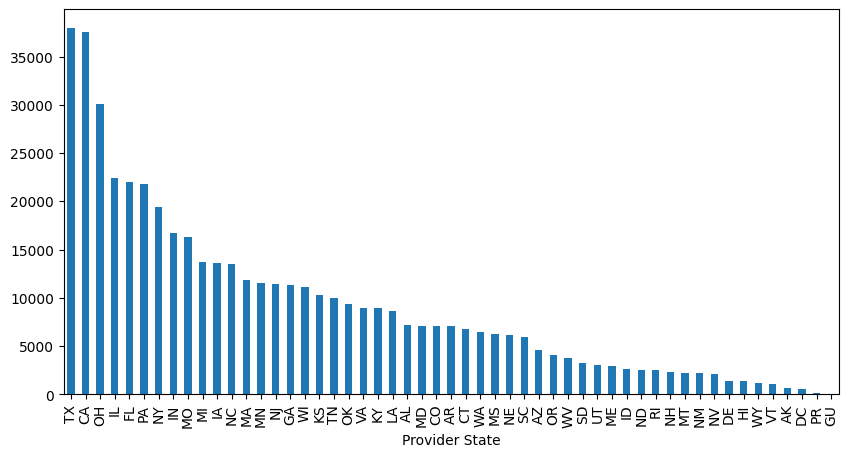

In [23]:
import matplotlib.pyplot as plt
# bar graph for the categorical variable

# make a bar graph for the provider state
df['Provider State'].value_counts().plot(kind='bar')

# make the dimensions of the plot bigger
plt.rcParams['figure.figsize'] = [10, 5]

plt.show()

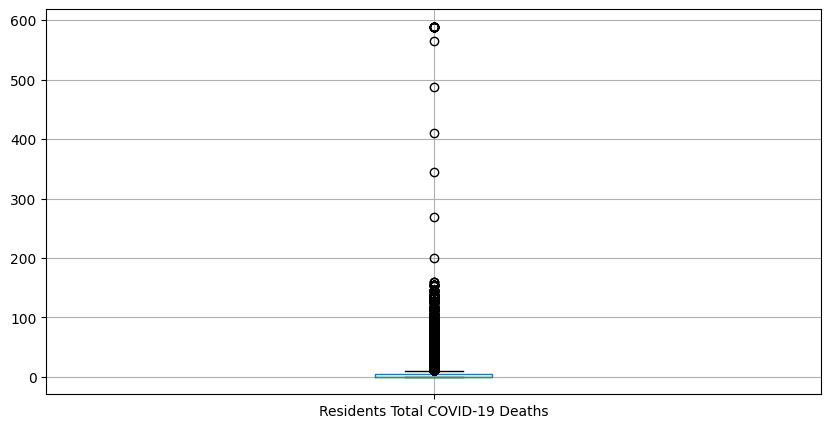

In [25]:
# box plot for resident total covid 19 deaths
df.boxplot(column='Residents Total COVID-19 Deaths')
plt.show()

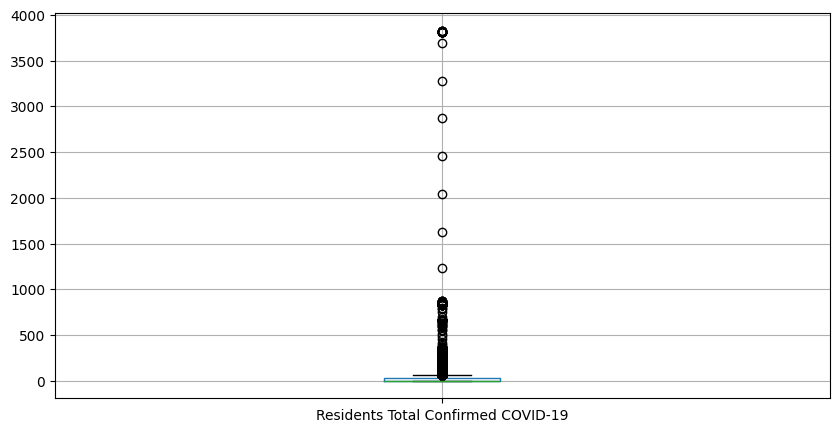

In [26]:
# box plot for resident total confirmed covid 19
df.boxplot(column='Residents Total Confirmed COVID-19')
plt.show()

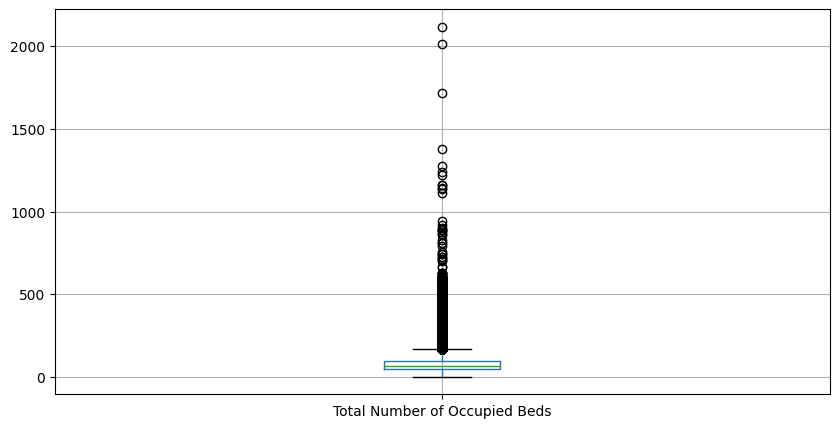

In [27]:
# box plot of total number of occupied beds
df.boxplot(column='Total Number of Occupied Beds')
plt.show()

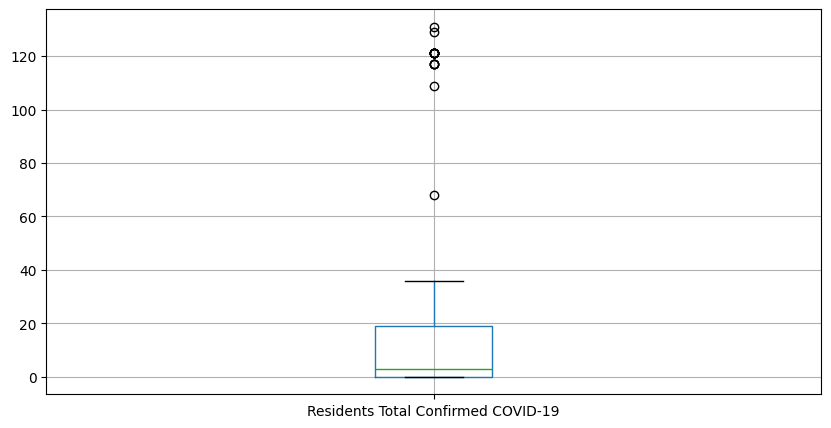

In [32]:
# resident total confirmed covid 19 in provider city of charlottesville
df[df['Provider City'] == 'CHARLOTTESVILLE'].boxplot(column='Residents Total Confirmed COVID-19')
plt.show()

Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?

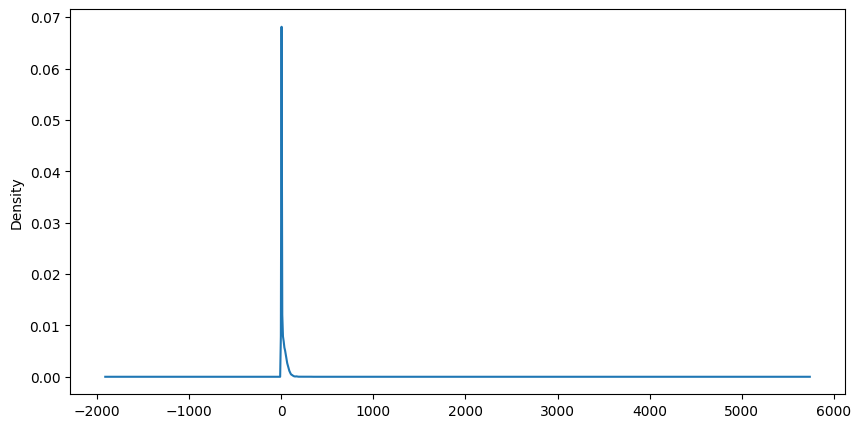

In [33]:
# create a kernel density plot of residents total confirmed covid 19
df['Residents Total Confirmed COVID-19'].plot(kind='kde')
plt.show()

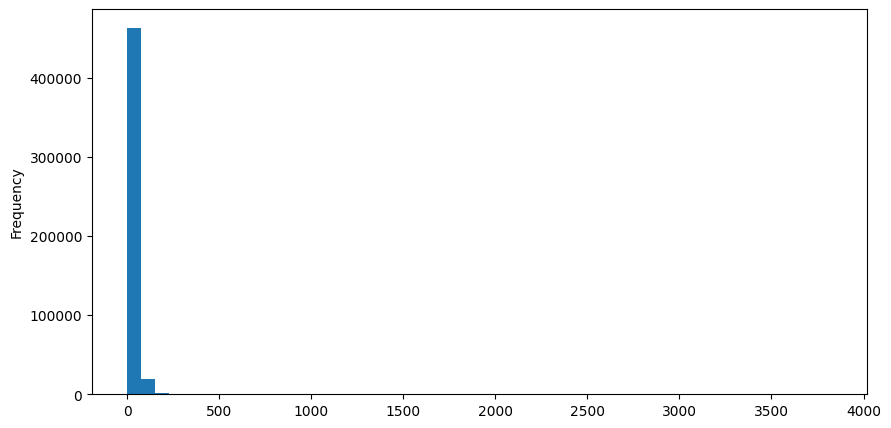

In [39]:
# create a histogram of residents total confirmed covid 19
df['Residents Total Confirmed COVID-19'].plot(kind='hist', bins=50)
plt.show()

Create a scatter plot, and describe the relationship you see.

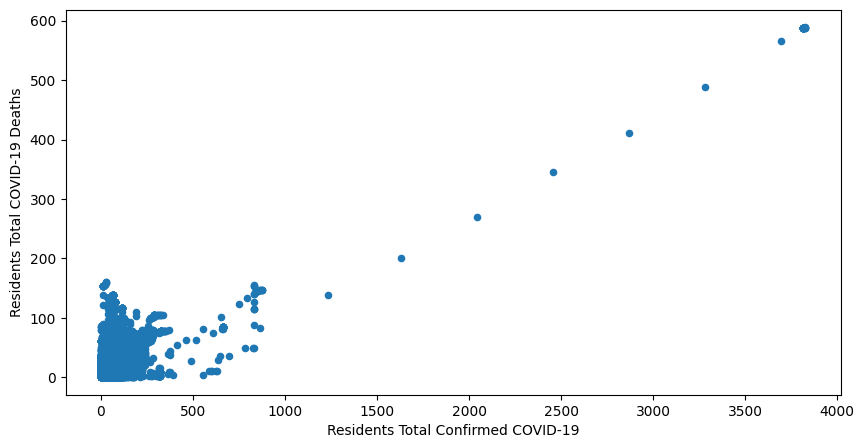

In [34]:
# create a scatter plot between residents total confirmed covid 19 and residents total covid 19 deaths
df.plot(x='Residents Total Confirmed COVID-19', y='Residents Total COVID-19 Deaths', kind='scatter')
plt.show()

Create a table (cross tabulation, variance-covariance, or a .describe() five-number summary), and explain what you see.

In [35]:
df.describe()

,Provider Zip Code,Provider Phone Number,Residents Weekly Confirmed COVID-19,Residents Total Confirmed COVID-19,Residents Weekly All Deaths,Residents Total All Deaths,Residents Weekly COVID-19 Deaths,Residents Total COVID-19 Deaths,Number of All Beds,Total Number of Occupied Beds,Residents Hospitalizations with Confirmed COVID-19
count,483858.000000,4.838580e+05,483858.000000,483858.000000,483858.000000,483858.000000,483858.000000,483858.000000,482346.000000,483686.000000,483858.0
mean,50275.464364,5.874253e+09,1.109166,16.911852,0.715152,13.337659,0.214201,3.781392,106.023234,75.231619,0.0
std,26877.578877,2.329891e+09,5.295044,39.069918,3.354332,34.358326,1.308784,8.926687,58.583433,45.898911,0.0
min,660.000000,1.112223e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,29720.000000,3.867922e+09,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,65.000000,45.000000,0.0
50%,48809.000000,6.058543e+09,0.000000,2.000000,0.000000,8.000000,0.000000,0.000000,99.000000,68.000000,0.0
75%,72764.000000,8.017824e+09,0.000000,25.000000,1.000000,17.000000,0.000000,4.000000,126.000000,94.000000,0.0
max,99929.000000,9.898959e+09,413.000000,3827.000000,986.000000,2798.000000,89.000000,589.000000,815.000000,2118.000000,0.0


There are a lot of outliers in this data set wthich is evident in how the means are extremely low and the maxes are very high. For example, the residents total confirmed covid-19 mean is 16.9 and the max is 3827. For the residents total all deaths the 75th percentile is 17 and the max is 2798. This is a pattern in every column where most of the nursing homes have very low numbers of deaths and cases, yet the outliers are significantly skewing the mean.